# 模块一：使用Python可视化一般研究数据

**目标：** 使用Matplotlib和Seaborn来创建一般研究数据的可视化。

- 使用Matplotlib进行基本绘图（线、条形、散点、直方图）。
- 使用Seaborn进行统计绘图（分布图、箱型图、热力图）。
- 自定义图表以提高清晰度和影响力。

**要使用的库：** pandas, Matplotlib, Seaborn 

In [1]:
#-------------------------------------------------------------------------------
#  SETUP
#-------------------------------------------------------------------------------
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Often useful for data generation/manipulation

# Optional: for embedding plots directly in the notebook
%matplotlib inline

# Optional: Set a default style for Seaborn plots for better aesthetics
sns.set_theme(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


## Matplotlib简介

Matplotlib是一个用于在Python中创建静态、动画和交互式可视化的全面库。它提供了一个低级接口，可以对你的图表进行精细控制。我们将从它的`pyplot`模块开始。 

In [2]:
#-------------------------------------------------------------------------------
# Hands-on: Matplotlib Basics
#-------------------------------------------------------------------------------
# --- Load a Simple Dataset (e.g., Iris) ---
iris_df = pd.read_csv('iris.csv')
print("Iris dataset loaded from Seaborn:")
print(iris_df.head())

Iris dataset loaded from Seaborn:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


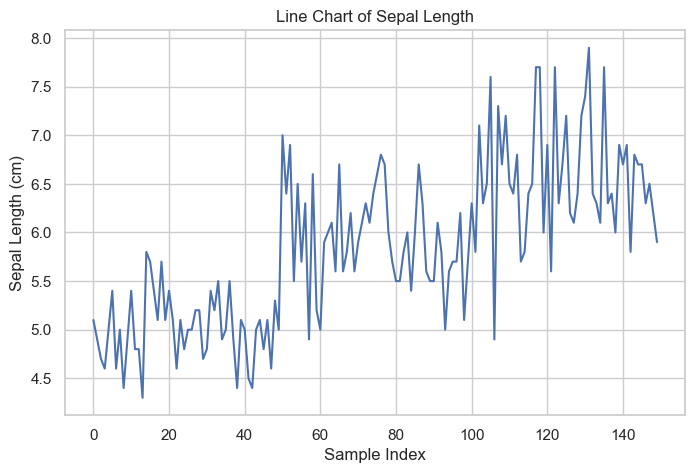

In [3]:
# --- Line Chart ---
# Example: Plotting sepal length (artificial index for x-axis)
plt.figure(figsize=(8, 5))
plt.plot(iris_df['sepal_length'])
plt.title('Line Chart of Sepal Length')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.show()

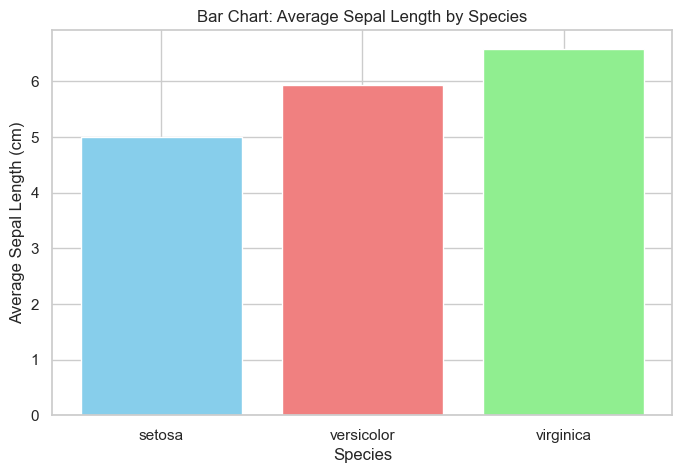

In [4]:
# --- Bar Chart ---
# Example: Average sepal length per species
avg_sepal_length = iris_df.groupby('species')['sepal_length'].mean()
plt.figure(figsize=(8, 5))
plt.bar(avg_sepal_length.index, avg_sepal_length.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Bar Chart: Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.show()

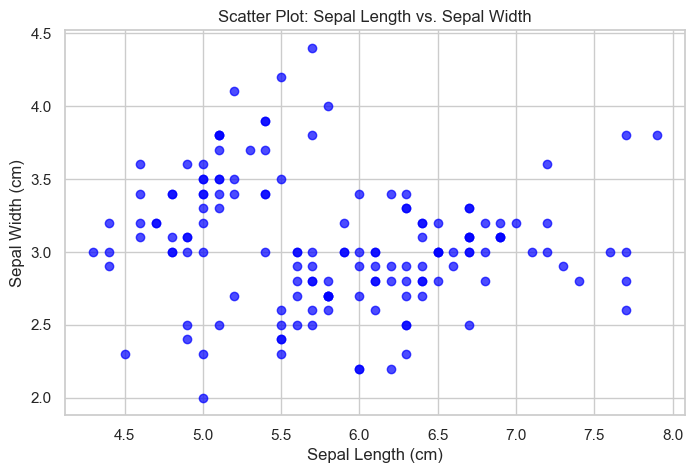

In [5]:
# --- Scatter Plot ---
# Example: Sepal length vs. Sepal width
plt.figure(figsize=(8, 5))
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c='blue', alpha=0.7)
plt.title('Scatter Plot: Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

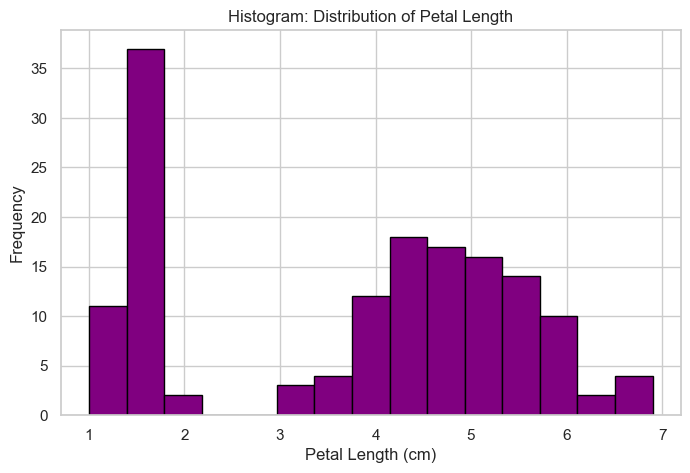

In [6]:
# --- Histogram ---
# Example: Distribution of petal length
plt.figure(figsize=(8, 5))
plt.hist(iris_df['petal_length'], bins=15, color='purple', edgecolor='black')
plt.title('Histogram: Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

**散点图矩阵**： 观察特征关系和类别分布。

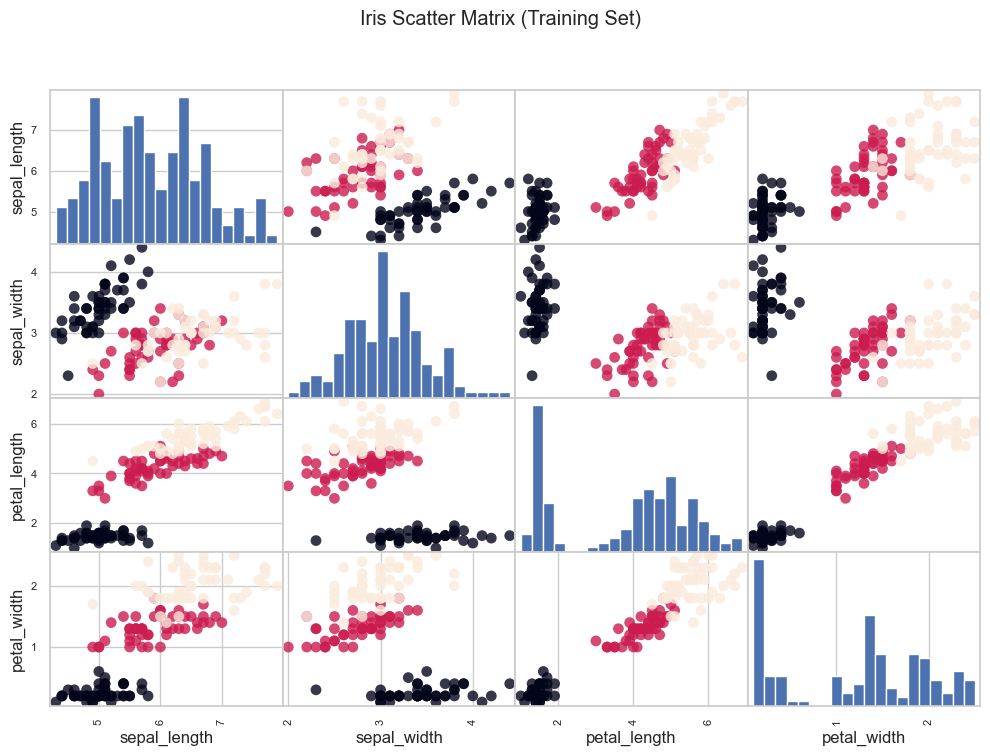

In [7]:
# 将字符串标签转换为分类类型
iris_df['species'] = pd.Categorical(iris_df['species'])
feature_columns = [
    'sepal_length', 
    'sepal_width', 
    'petal_length', 
    'petal_width'
]
scatter_matrix(iris_df[feature_columns], c=iris_df['species'].cat.codes, figsize=(12, 8), marker='o',
               hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.suptitle("Iris Scatter Matrix (Training Set)")
plt.show()

**自定义属性**：
- 使用`plt.title()`、`plt.xlabel()`、`plt.ylabel()`添加标签。
- 在`plt.plot()`中使用`color`（颜色）、`linestyle`（线条样式）、`marker`（标记）参数。
- 在`plt.figure()`中使用`figsize`调整绘图大小。
- 使用`plt.legend()`添加图例。

## Seaborn简介

Seaborn构建于Matplotlib之上，为绘制美观且信息丰富的统计图形提供了高级接口。对于复杂绘图，它通常所需代码更少，且默认美学效果更佳。 

In [8]:
#-------------------------------------------------------------------------------
# Hands-on: Seaborn Statistical Plots
#-------------------------------------------------------------------------------
# --- Load a Dataset (e.g., Titanic) ---
# Titanic dataset is available directly from Seaborn
titanic_df = pd.read_csv('titanic.csv')
print("Titanic dataset loaded from Seaborn:")
print(titanic_df.head())

Titanic dataset loaded from Seaborn:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


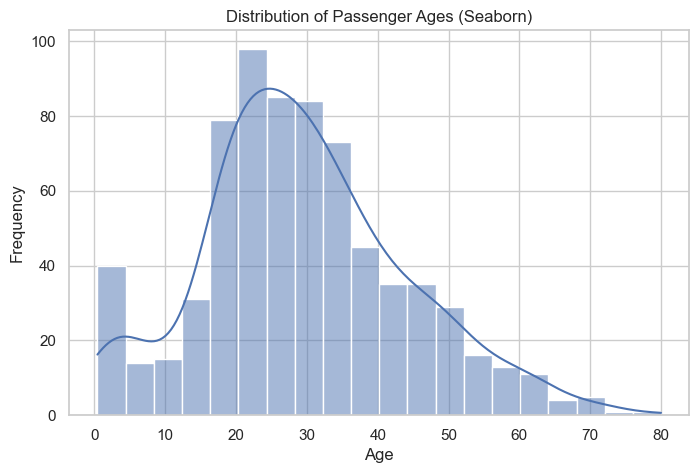

In [9]:
# --- Distribution Plot (Histogram + KDE) ---
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_df, x='age', kde=True, bins=20)
plt.title('Distribution of Passenger Ages (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

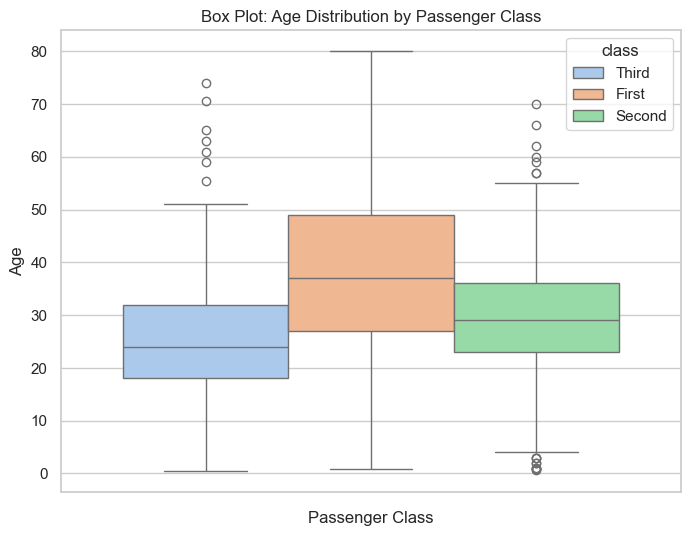

In [10]:
# --- Box Plot ---
# Example: Age distribution by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, hue='class', y='age', palette='pastel')
plt.title('Box Plot: Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

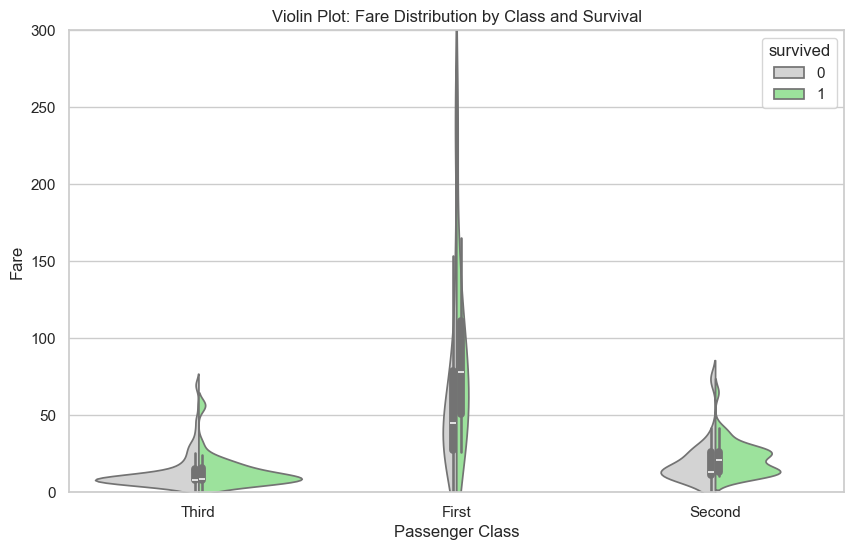

In [11]:
# --- Violin Plot ---
# Example: Fare distribution by passenger class and survival
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic_df, x='class', y='fare', hue='survived', split=True, palette={0: "lightgrey", 1: "lightgreen"})
plt.title('Violin Plot: Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, 300) # Limiting fare for better visualization
plt.show()

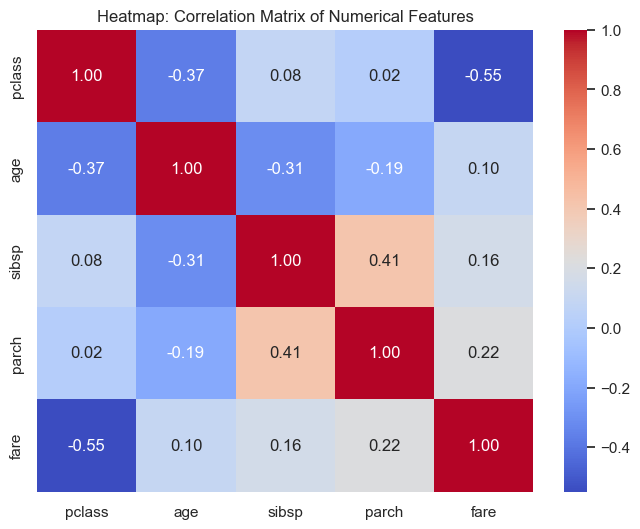

In [12]:
# --- Heatmap ---
# Example: Correlation matrix of numerical features
# Select only numerical columns for correlation
numerical_cols = titanic_df.select_dtypes(include=np.number).drop(columns=['survived'], errors='ignore') # Often 'survived' is target
if not numerical_cols.empty:
    correlation_matrix = numerical_cols.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap: Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("No numerical columns found for heatmap after dropping 'survived'.")

## 应用

思考一下这些图表可以如何使用：

- **研究**：
    - 探索数据分布（直方图、核密度估计图）。
    - 比较不同组别（柱状图、箱线图、小提琴图）。
    - 展示关系（散点图）。
    - 呈现相关矩阵（热力图）。
- **教学**：
    - 以可视化方式解释统计概念。
    - 用数据驱动的故事吸引学生。
    - 说明各个学科中的趋势和模式。

## 结论

我们通过实践初步了解了如何使用Python中的Matplotlib和Seaborn创建基本的数据可视化图表。使用你自己的数据集进行练习，进一步巩固这些技能！

## 练习

`penguins.csv`是一个企鹅品质的数据集，试用可视化对该数据进行分析